# Julia Jupyter notebook for *Developmental hematopoietic stem cell fate decisions explain clonal dynamics over lifetime*

This notebook is organized as follows:

1) Methylation data loading (see data_processing.ipynb for data processing code)
2) Define clones and fitness values for model simulations
3) Initial Pearson value simulations and plots
4) Simulation of embryos up to birth (from N_clones cells to N_cells cells)
5) Simulation of the human lifespan (from birth to 100 years)
6) Comparsion of fitness distributions
7) Large-scale multiple simulations to compare to the data

In [1]:
#packages
using Statistics
using LinearAlgebra
using DataStructures
using StatsBase
using StatsPlots
using Distributions
using LsqFit
using Random
using ColorSchemes
using Plots; pyplot()
using DelimitedFiles
using DataFrames 

#random number generator
rng = MersenneTwister()

#color definitions
logocolors = Colors.JULIA_LOGO_COLORS
color1 = RGBA(216/255,27/255,96/255,1)
color3 = RGBA(30/255,136/255,229/255,1)
color5 = RGBA(255/255,193/255,7/255,1)

## Data loading

In [2]:
mz_data_all = readdlm("mz_data_all.csv", ',')
dz_data_all = readdlm("dz_data_all.csv", ',')
ur_data_all = readdlm("ur_data_all.csv", ',')

mz_data_mean_all = readdlm("mz_data_mean_all.csv", ',')
dz_data_mean_all = readdlm("dz_data_mean_all.csv", ',')
ur_data_mean_all = readdlm("ur_data_mean_all.csv", ',')

7×2 Matrix{Float64}:
  0.0  0.640522
 18.0  0.576683
 28.0  0.554407
 56.0  0.557308
 18.0  0.454919
 76.0  0.405889
 86.0  0.358973

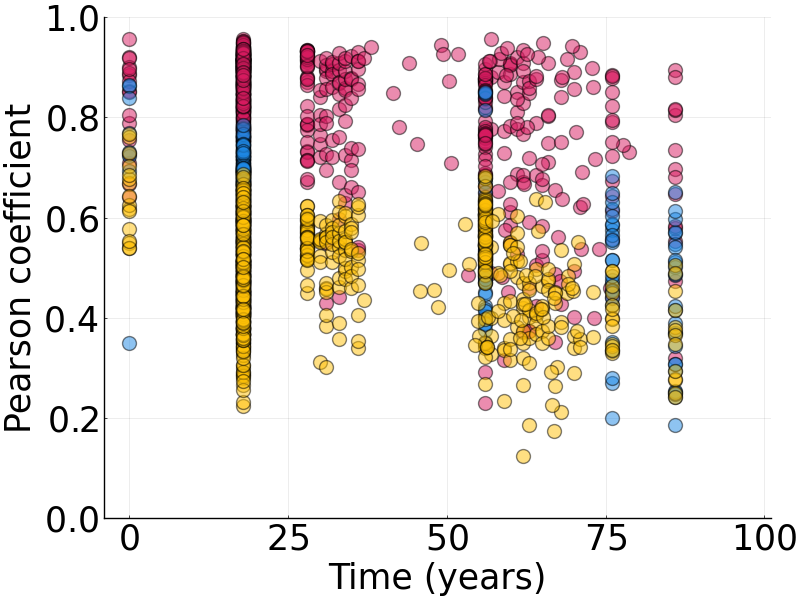

In [3]:
#plot all data together
scatter()
scatter!(mz_data_all[:,1], mz_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(dz_data_all[:,1], dz_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(ur_data_all[:,1], ur_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

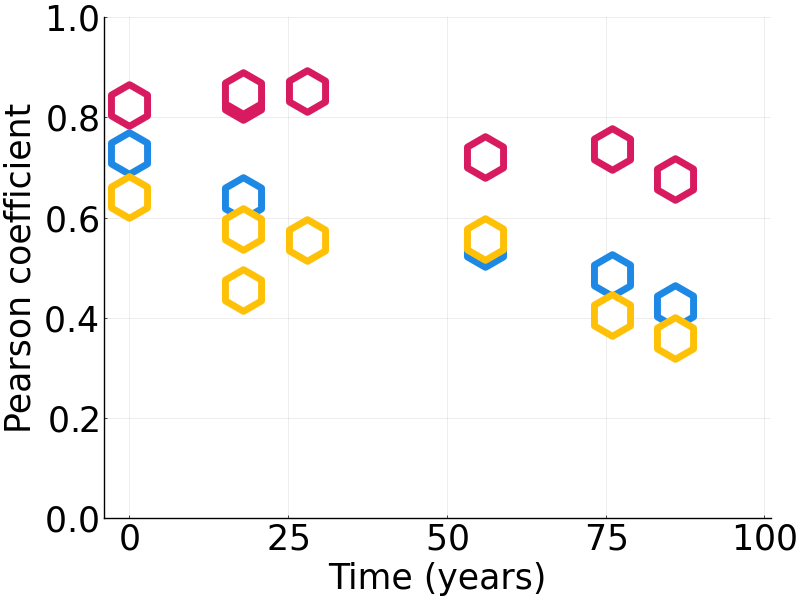

In [4]:
#plot all data together
scatter()
scatter!(mz_data_mean_all[:,1], mz_data_mean_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(dz_data_mean_all[:,1], dz_data_mean_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(ur_data_mean_all[:,1], ur_data_mean_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

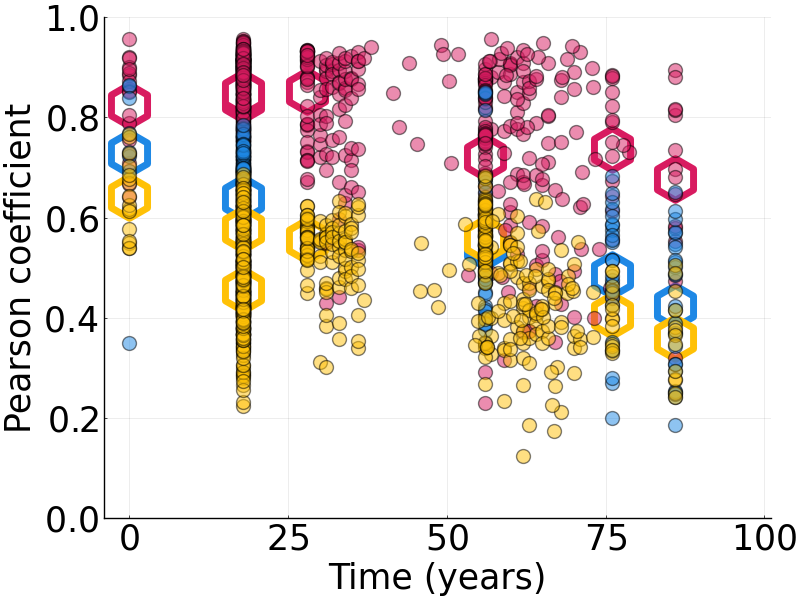

In [5]:
#plot all data together
scatter()

scatter!(mz_data_mean_all[:,1], mz_data_mean_all[:,2], xlims = [-5, 101], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(dz_data_mean_all[:,1], dz_data_mean_all[:,2], xlims = [-5, 101], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(ur_data_mean_all[:,1], ur_data_mean_all[:,2], xlims = [-5, 101], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

scatter!(mz_data_all[:,1], mz_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(dz_data_all[:,1], dz_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(ur_data_all[:,1], ur_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, alpha = 0.5, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

In [6]:
#line of best fit and confidence interval (monozygotic twins) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mean_mz = curve_fit(model, mz_data_mean_all[:,1], mz_data_mean_all[:,2], p0)
sigma_mean_mz = stderror(fit_mean_mz)
margin_of_error_mean_mz = margin_error(fit_mean_mz, 0.05)
confidence_inter_mean_mz = confidence_interval(fit_mean_mz, 0.05)
bf_parms_mean_mz = coef(fit_mean_mz)

2-element Vector{Float64}:
 -0.002002027373549848
  0.866231665987594

In [7]:
interval_p1_mean_mz = confidence_inter_mean_mz[1]

(-0.0031007428157775836, -0.0009033119313221127)

In [8]:
interval_p2_mean_mz = confidence_inter_mean_mz[2]

(0.8109204742092124, 0.9215428577659757)

In [9]:
#line of best fit and confidence interval (dizygotic twins) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mean_dz = curve_fit(model, dz_data_mean_all[:,1], dz_data_mean_all[:,2], p0)
sigma_mean_dz = stderror(fit_mean_dz)
margin_of_error_mean_dz = margin_error(fit_mean_dz, 0.05)
confidence_inter_mean_dz = confidence_interval(fit_mean_dz, 0.05)
bf_parms_mean_dz = coef(fit_mean_dz)

2-element Vector{Float64}:
 -0.003268442721304369
  0.7182065057877078

In [10]:
interval_p1_mean_dz = confidence_inter_mean_dz[1]

(-0.004052824714293255, -0.0024840607283154828)

In [11]:
interval_p2_mean_dz = confidence_inter_mean_dz[2]

(0.6729673125924238, 0.7634456989829919)

In [12]:
#line of best fit and confidence interval (unrelated individuals) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mean_ur = curve_fit(model, ur_data_mean_all[:,1], ur_data_mean_all[:,2], p0)
sigma_mean_ur = stderror(fit_mean_ur)
margin_of_error_mean_ur = margin_error(fit_mean_ur, 0.05)
confidence_inter_mean_ur = confidence_interval(fit_mean_ur, 0.05)
bf_parms_mean_ur = coef(fit_mean_ur)

2-element Vector{Float64}:
 -0.0024988537114151135
  0.6076253109741785

In [13]:
interval_p1_mean_ur = confidence_inter_mean_ur[1]

(-0.004656637828577773, -0.00034106959425245394)

In [14]:
interval_p2_mean_ur = confidence_inter_mean_ur[2]

(0.4989988126710939, 0.7162518092772631)

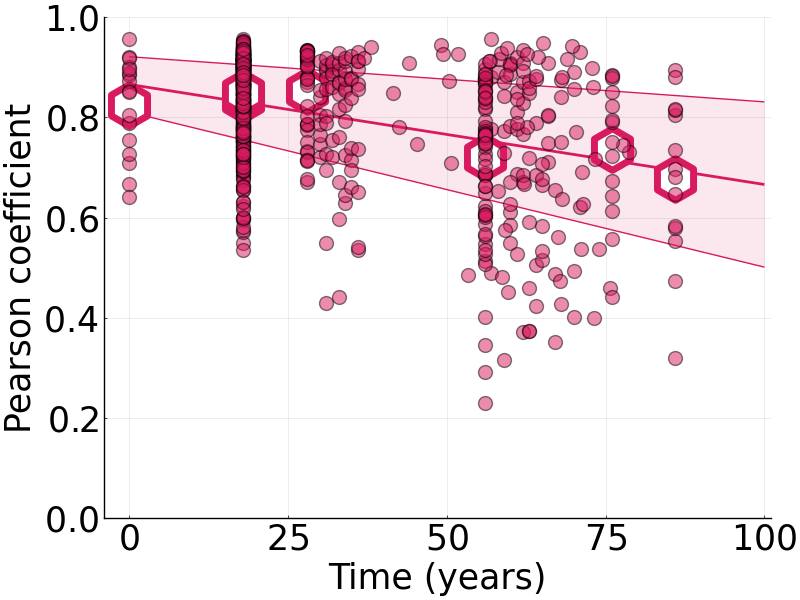

In [15]:
#plot with line of best fit and confidence interval (monozygotic twins) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(mz_data_all[:,1], mz_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

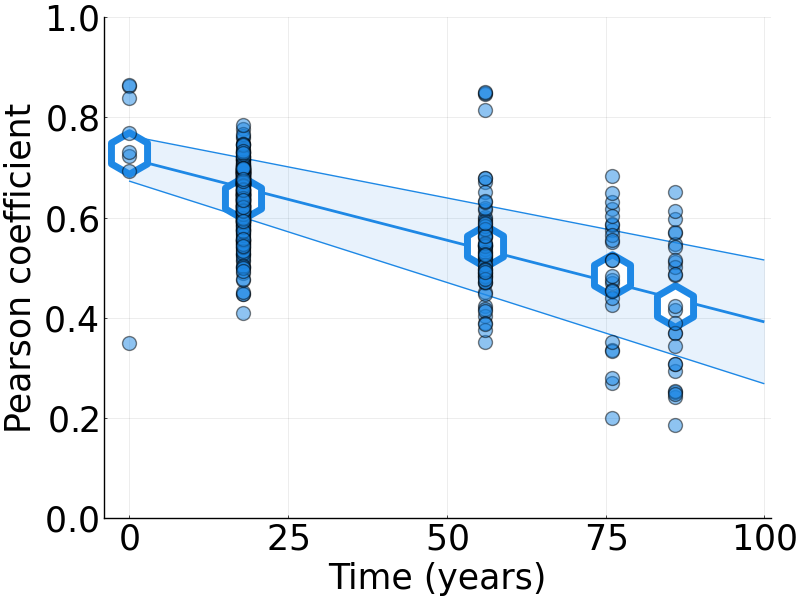

In [16]:
#plot with line of best fit and confidence interval (dizygotic twins) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
scatter!(dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(dz_data_all[:,1], dz_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

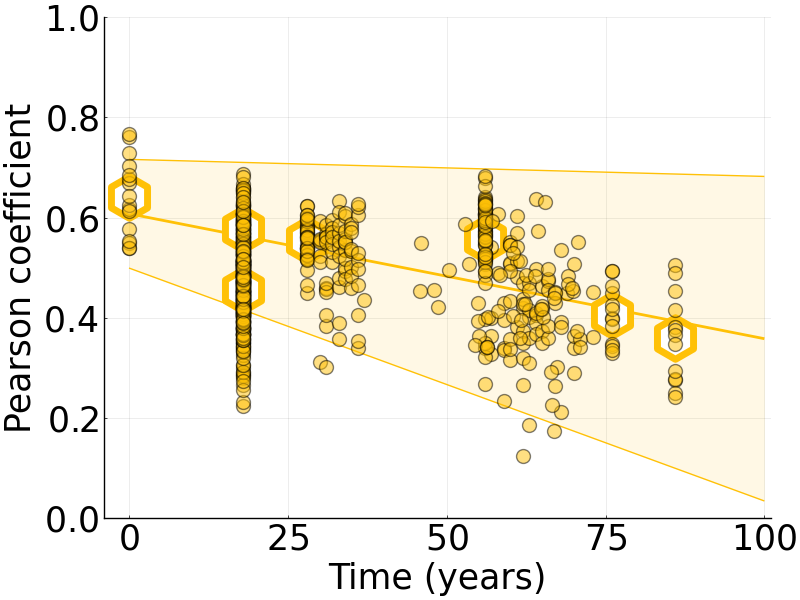

In [17]:
#plot with line of best fit and confidence interval (unrelated individuals) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
scatter!(ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(ur_data_all[:,1], ur_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

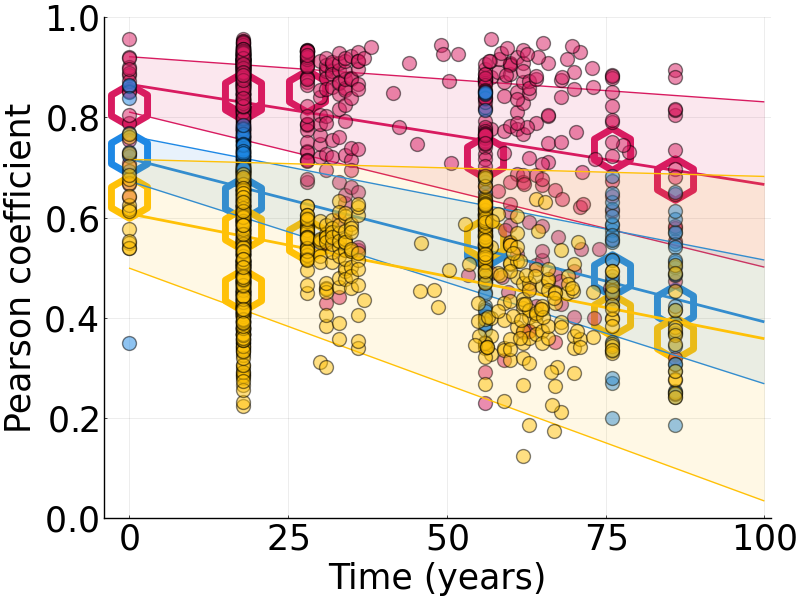

In [18]:
#plot all data together
scatter()

scatter!(mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(mz_data_all[:,1], mz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
scatter!(dz_data_all[:,1], dz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
scatter!(ur_data_all[:,1], ur_data_all[:,2], xlims = [-4, 101], ylims = (0.0, 1.0), markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

## Define clones and fitness values

In [19]:
#define parameters
number_of_locations = 1000 #number of fCpG sites
number_of_clones = 10 #number of clones
a_shape = 0.05 #gamma distribution shape parameter
theta_scale = 0.05 #gamam distribution scale parameter

0.05

In [20]:
#define initial clones
initial_clones = zeros(number_of_clones,number_of_locations)
for i = 1:number_of_clones
    for j = 1:number_of_locations
        initial_clones[i,j] = 2*rand(rng, 0:1)
    end
end

In [21]:
initial_clones

10×1000 Matrix{Float64}:
 0.0  0.0  2.0  2.0  0.0  0.0  0.0  2.0  …  2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  0.0  2.0  0.0  0.0     0.0  2.0  2.0  2.0  2.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0  0.0  2.0  0.0     2.0  0.0  0.0  2.0  2.0  2.0  0.0
 2.0  2.0  0.0  2.0  0.0  0.0  2.0  0.0     2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  0.0  0.0  0.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  0.0  0.0
 2.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  …  0.0  2.0  2.0  0.0  0.0  0.0  2.0
 0.0  2.0  2.0  0.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  0.0  2.0  2.0  0.0
 0.0  0.0  2.0  2.0  2.0  2.0  0.0  2.0     0.0  2.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  0.0  2.0  0.0     0.0  0.0  0.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  0.0  2.0  2.0

In [22]:
#clone fitness coefficients
dist = Gamma(a_shape,theta_scale)
fitness_clones = AnalyticWeights(rand(dist,number_of_clones))

10-element AnalyticWeights{Float64, Float64, Vector{Float64}}:
 2.828218177131669e-10
 1.5473296095982131e-9
 1.2375663674835771e-6
 2.2170755460961007e-5
 4.3657422591330845e-9
 1.5665175620789069e-18
 3.567401295978888e-16
 1.4989029732400084e-9
 0.00034384457905074436
 0.00041320255646823157

In [23]:
fitness_clones = fitness_clones .+ 1

10-element Vector{Float64}:
 1.0000000002828218
 1.0000000015473296
 1.0000012375663674
 1.000022170755461
 1.0000000043657422
 1.0
 1.0000000000000004
 1.000000001498903
 1.0003438445790507
 1.0004132025564683

In [24]:
#clone with highest fitness
print(findmax(fitness_clones), "\n")

(1.0004132025564683, 10)


## Initial Pearson value simulations and plots

In [25]:
#define parameters
number_of_cells = 5000 #number of cells
number_of_locations = 1000 #number of fCpG sites
number_of_shared_cells = 10 #number of shared cells 
number_of_clones = 10 #number of clones 
number_of_twins = 2 #number of twins
number_of_simulations = 1 #number of simulations

1

In [26]:
initial_clones

10×1000 Matrix{Float64}:
 0.0  0.0  2.0  2.0  0.0  0.0  0.0  2.0  …  2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  0.0  2.0  0.0  0.0     0.0  2.0  2.0  2.0  2.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0  0.0  2.0  0.0     2.0  0.0  0.0  2.0  2.0  2.0  0.0
 2.0  2.0  0.0  2.0  0.0  0.0  2.0  0.0     2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  0.0  0.0  0.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  0.0  0.0
 2.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  …  0.0  2.0  2.0  0.0  0.0  0.0  2.0
 0.0  2.0  2.0  0.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  0.0  2.0  2.0  0.0
 0.0  0.0  2.0  2.0  2.0  2.0  0.0  2.0     0.0  2.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  0.0  2.0  0.0     0.0  0.0  0.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  0.0  2.0  2.0

In [27]:
initial_clones = initial_clones[1:number_of_clones,:]
fitness_clones = fitness_clones[1:number_of_clones]

10-element Vector{Float64}:
 1.0000000002828218
 1.0000000015473296
 1.0000012375663674
 1.000022170755461
 1.0000000043657422
 1.0
 1.0000000000000004
 1.000000001498903
 1.0003438445790507
 1.0004132025564683

In [28]:
initial_clones

10×1000 Matrix{Float64}:
 0.0  0.0  2.0  2.0  0.0  0.0  0.0  2.0  …  2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  0.0  2.0  0.0  0.0     0.0  2.0  2.0  2.0  2.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0  0.0  2.0  0.0     2.0  0.0  0.0  2.0  2.0  2.0  0.0
 2.0  2.0  0.0  2.0  0.0  0.0  2.0  0.0     2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  0.0  0.0  0.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  0.0  0.0
 2.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  …  0.0  2.0  2.0  0.0  0.0  0.0  2.0
 0.0  2.0  2.0  0.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  0.0  2.0  2.0  0.0
 0.0  0.0  2.0  2.0  2.0  2.0  0.0  2.0     0.0  2.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  0.0  2.0  0.0     0.0  0.0  0.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  0.0  2.0  2.0

In [29]:
#perform number_of_simulations simulations calculating the initial Pearson coefficient at birth
pearson_cells = zeros(number_of_simulations)

clone_count_shared = zeros(number_of_clones)
clone_count_unshared = zeros(number_of_clones,number_of_twins)

for simmys = 1:number_of_simulations
    print(simmys, "  ")

    ave_cells = zeros(number_of_locations, 101, number_of_twins)

    #define initial conditions
    shared_cells = zeros(number_of_cells,number_of_locations)
    frequencies = zeros(number_of_clones)

    #define initial number_of_clones cells
    for i = 1:number_of_clones
        shared_cells[i,:] = initial_clones[i,:]
    end

    #select rest of cells
    for i = number_of_clones+1:number_of_shared_cells

        frequencies = zeros(number_of_clones)
        for k = 1:number_of_clones
            for j = 1:i-1 
                if shared_cells[j,:] == initial_clones[k,:]
                    frequencies[k] = frequencies[k] + 1
                end
            end
        end
        frequencies = frequencies/(i-1)

        #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent growth
        l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent growth weighted by fitness
        #l = rand(rng, 1:number_of_clones) #uniform growth
        #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform growth weighted by fitness
        shared_cells[i,:] = initial_clones[l,:]
    end

    clone_count_shared = zeros(number_of_clones)
    clone_count_unshared = zeros(number_of_clones,number_of_twins)
    for k = 1:number_of_clones
        for j = 1:number_of_shared_cells
            if shared_cells[j,:] == initial_clones[k,:]
                clone_count_shared[k] = clone_count_shared[k] + 1
            end
        end
    end

    #simulate number_of_twins individuals
    for sim_number = 1:number_of_twins

        #define initial conditions
        cells = zeros(number_of_cells,number_of_locations)
        cells[1:number_of_shared_cells,:] = copy(shared_cells[1:number_of_shared_cells,:])
        frequencies = zeros(number_of_clones)


        #select rest of cells
        for i = number_of_shared_cells+1:number_of_cells

            frequencies = zeros(number_of_clones)
            for k = 1:number_of_clones
                for j = 1:i-1 
                    if cells[j,:] == initial_clones[k,:]
                        frequencies[k] = frequencies[k] + 1
                    end
                end
            end
            frequencies = frequencies/(i-1)

            #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent growth
            l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent growth weighted by fitness
            #l = rand(rng, 1:number_of_clones) #uniform growth
            #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform growth weighted by fitness    
            cells[i,:] = initial_clones[l,:]
        end

        for k = 1:number_of_clones
            for j = 1:number_of_cells
                if cells[j,:] == initial_clones[k,:]
                    clone_count_unshared[k,sim_number] = clone_count_unshared[k,sim_number] + 1
                end
            end
        end

        time_years = 1
        t = 0
        ave_cells[:,1,sim_number] = mean(cells,dims=1)

    end

#calculate the Pearson coefficient
cor_cells = cor(ave_cells[:,1,:])
vec_cells = cor_cells[tril!(trues(size(cor_cells)), -1)]
pearson_cells[simmys] = vec_cells[1]

end

1  

┌ Warning: Keyword argument fillstyle not supported with Plots.PyPlotBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_edges, bar_position, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_tickfontcolor, colorbar_tickfontfamily, colorbar_tickfonthalign, colorbar_tickfontrotation, colorbar_tickfontsize, colorbar_tickfontvalign, colorbar_ticks, colorbar_title, connections, contour_labels, contours, discrete_values, dpi, fill_z, fillalpha, fillcolor, fillrange, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_subplot, foreground_color_text, foreground_color_title, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guide_position, guidefontcolor, guidefontfamily, guidefontsize, html_output_format, inset_subplots, labe

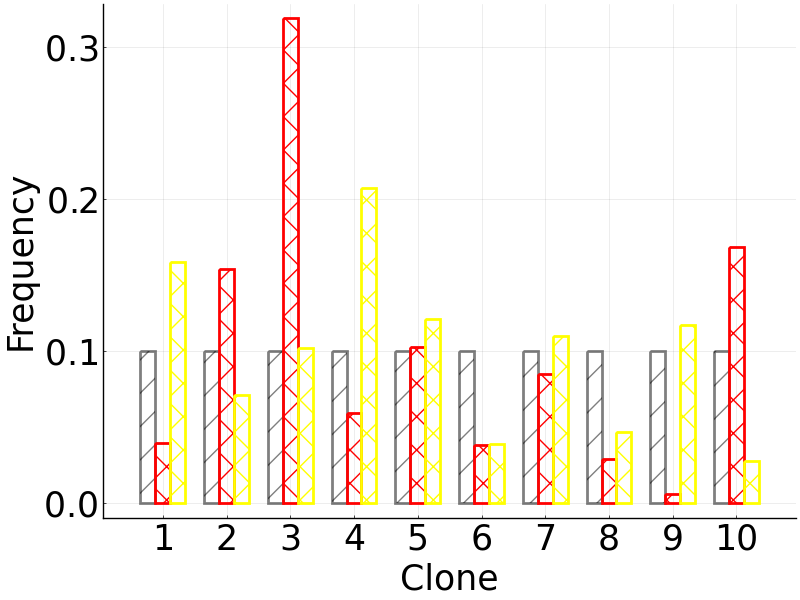

In [30]:
#plot frequencies of final simulation
groupedbar([clone_count_shared./number_of_shared_cells clone_count_unshared[:,1]./number_of_cells clone_count_unshared[:,2]./number_of_cells], linecolor = ["black" "red" "yellow"], color = ["black" "red" "yellow"], fillstyle = [:/ :x :x], bar_position = :dodge, bar_width=0.7, xticks = ([1:1:number_of_clones;], [1:1:number_of_clones;]), size =(1600/2,600), font = "Ariel", alpha = [0.5 1 1], width = [2 2 2], legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Clone", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "", titlefontsize=25)

┌ Warning: Skipped xaxis arg linear
└ @ Plots /Users/jessekreger/.julia/packages/Plots/FCUr0/src/axes.jl:76
┌ Warning: Skipped xaxis arg linear
└ @ Plots /Users/jessekreger/.julia/packages/Plots/FCUr0/src/axes.jl:76


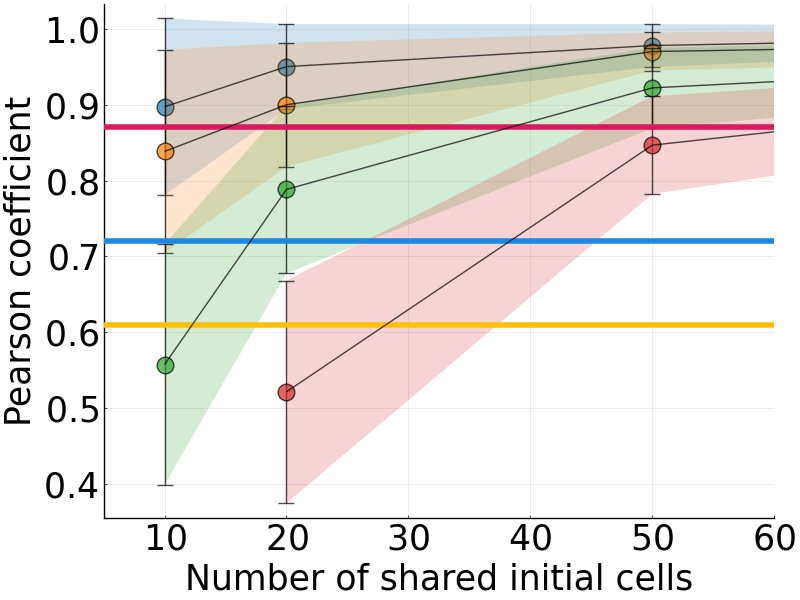

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [31]:
#initial Pearson value plots
shared_cells_vector = [10,20,50,100,500,1000]
shared_cells_vector_20 = [20,50,100,500,1000]

mean_clone_3 = [0.897106256,0.949973599,0.977729097,0.99297954,0.999065375,1]
std_clone_3 = [0.116262348,0.055967161,0.028194869,0.010025733,0.001236511,0]

mean_clone_5 = [0.838347521,0.899802896,0.969811952,0.983468209,0.998002138,1]
std_clone_5 = [0.133731087,0.081416945,0.0251072,0.018366666,0.002228976,0]

mean_clone_10 = [0.55778169,0.788315491,0.921978271,0.96304726,0.995413925,1]
std_clone_10 = [0.158302619,0.110301118,0.052999009,0.026002732,0.002850987,0]

mean_clone_20 = [0.5218214522499879,0.8465648573706308,0.9344863796810127,0.9920247455643221,1]
std_clone_20 = [0.14652678713631667,0.06427120840003198,0.03152363576659686,0.00447090852570264,0]


mean_vector = [mean_clone_3 mean_clone_5 mean_clone_10]
std_vector = [std_clone_3 std_clone_5 std_clone_10]

plot()
plot!(shared_cells_vector,mean_vector,yerror=std_vector,ribbon=std_vector,fillalpha= 0.2,grid=true,palette=:tab10, xaxis = :linear, xlims = (5,60), align="center",alpha=0.7,label = "",xlabel = "Number of shared cells",ylabel = "Pearson coefficient", seriestype =:scatter, markersize = 12,font = "Ariel")
plot!(shared_cells_vector_20,mean_clone_20,yerror=std_clone_20,ribbon=std_clone_20,fillalpha= 0.2,grid=true,palette=:tab10, xaxis = :linear, align="center",alpha=0.7,label = "",xlabel = "Number of shared cells",ylabel = "Pearson coefficient", seriestype =:scatter, markersize = 12,font = "Ariel")
hline!([0.87], legend = false, stlye = :dash, lw = 4, alpha = 1, color = color1)
hline!([0.72], legend = false, stlye = :dash, lw = 4, alpha = 1, color = color3)
hline!([0.61], legend = false, stlye = :dash, lw = 4, alpha = 1, color = color5)
plot!(shared_cells_vector_20,mean_clone_20,grid=true,color = "Black",alpha=0.7,align="center",label = "",xlabel = "Number of shared initial cells",ylabel = "Pearson coefficient", seriestype =:line, font = "Ariel") 
p1 = plot!(shared_cells_vector,mean_vector,grid=true,color = "Black",alpha=0.7,align="center",label = "",xlabel = "Number of shared initial cells",ylabel = "Pearson coefficient", seriestype =:line, font = "Ariel") 


plot()
plot(p1 ,size =(800,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

In [32]:
xfitty = copy(shared_cells_vector)
yfitty = copy(mean_clone_10)

6-element Vector{Float64}:
 0.55778169
 0.788315491
 0.921978271
 0.96304726
 0.995413925
 1.0

In [33]:
@. model3(x, p) = p[1]*(x/(x+p[2]))
p0y3 = [1.0, 0.01]
fity3 = curve_fit(model3, xfitty, yfitty, p0y3)
bf_parmsy3 = coef(fity3)

2-element Vector{Float64}:
 1.0244174934671504
 7.159109859307344

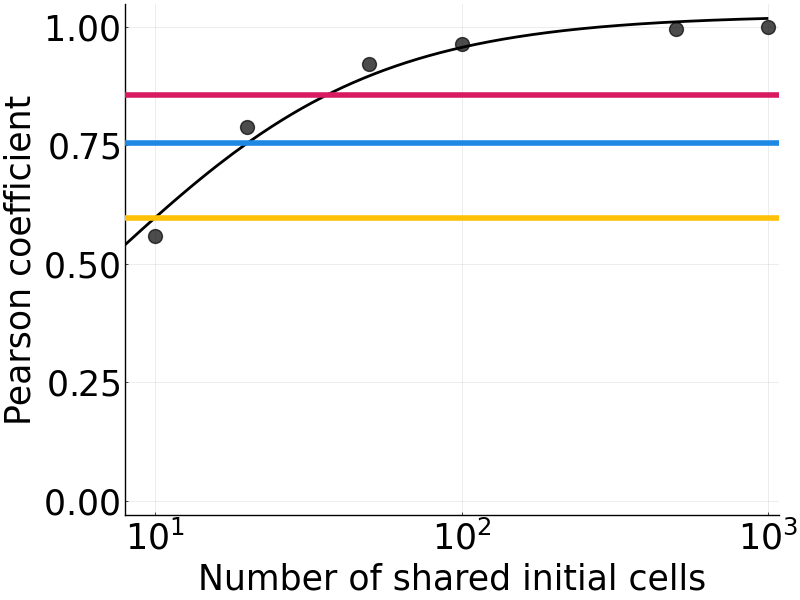

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/FCUr0/src/utils.jl:91


In [34]:
#plot with best fit curve
scatter()
plot!(LinRange(0.0,1000.0,1001), model3(LinRange(0.0,1000.0,1001), [bf_parmsy3[1], bf_parmsy3[2]]), xaxis = :log, xlims = [8,1080], linewidth = 2, color = "Black", alpha = 1)
scatter!(xfitty, yfitty, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of shared initial cells",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
hline!([0.8549131142595517], legend = false, stlye = :dash, lw = 4, alpha = 1, color = color1)
hline!([0.7542015800862559], legend = false, stlye = :dash, lw = 4, alpha = 1, color = color3)
hline!([0.597057621791513], legend = false, stlye = :dash, lw = 4, alpha = 1, color = color5)

In [35]:
0.8549131142595517/bf_parmsy3[1]*bf_parmsy3[2] / (1-(0.8549131142595517/bf_parmsy3[1]))

36.10772142736672

In [36]:
0.7542015800862559/bf_parmsy3[1]*bf_parmsy3[2] / (1-(0.7542015800862559/bf_parmsy3[1]))

19.981843039309524

In [37]:
0.597057621791513/bf_parmsy3[1]*bf_parmsy3[2] / (1-(0.597057621791513/bf_parmsy3[1]))

10.001877551073514

## Simulation of embryos up to birth (from N_clones cells to N_cells cells)

In [38]:
#define parameters
number_of_cells = 5000 #number of cells
number_of_locations = 1000 #number of fCpG sites
number_of_shared_cells = 10 #number of shared cells
number_of_clones = 10 #number of clones
number_of_twins = 2 #number of twins

#define clone growth matrices
clone_growth_plot = zeros(number_of_cells,number_of_clones,number_of_twins)
clone_memory = zeros(number_of_cells,number_of_twins)

5000×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 ⋮    
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [39]:
initial_clones

10×1000 Matrix{Float64}:
 0.0  0.0  2.0  2.0  0.0  0.0  0.0  2.0  …  2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  0.0  2.0  0.0  0.0     0.0  2.0  2.0  2.0  2.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0  0.0  2.0  0.0     2.0  0.0  0.0  2.0  2.0  2.0  0.0
 2.0  2.0  0.0  2.0  0.0  0.0  2.0  0.0     2.0  0.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  0.0  0.0  0.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  0.0  0.0
 2.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  …  0.0  2.0  2.0  0.0  0.0  0.0  2.0
 0.0  2.0  2.0  0.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  0.0  2.0  2.0  0.0
 0.0  0.0  2.0  2.0  2.0  2.0  0.0  2.0     0.0  2.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  0.0  2.0  0.0     0.0  0.0  0.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  0.0  2.0  2.0

In [40]:
fitness_clones

10-element Vector{Float64}:
 1.0000000002828218
 1.0000000015473296
 1.0000012375663674
 1.000022170755461
 1.0000000043657422
 1.0
 1.0000000000000004
 1.000000001498903
 1.0003438445790507
 1.0004132025564683

In [41]:
@time begin
    
    ave_cells = zeros(number_of_locations, 101, number_of_twins)

    #define initial conditions
    cells = zeros(number_of_cells,number_of_locations)
    cells_twins_initial = zeros(number_of_cells,number_of_locations,number_of_twins)
    shared_cells = zeros(number_of_cells,number_of_locations)
    frequencies = zeros(number_of_clones)

    #define initial number_of_clones cells
    for i = 1:number_of_clones
        shared_cells[i,:] = initial_clones[i,:]
        clone_memory[i,1] = i
        clone_memory[i,2] = i
    end

    #select rest of cells
    for i = number_of_clones+1:number_of_shared_cells

        frequencies = zeros(number_of_clones)
        for k = 1:number_of_clones
            for j = 1:i-1 
                if shared_cells[j,:] == initial_clones[k,:]
                    frequencies[k] = frequencies[k] + 1
                end
            end
        end
        frequencies = frequencies/(i-1)
        for twin_number = 1:number_of_twins
            clone_growth_plot[i,:,twin_number] = copy(frequencies)
        end

        #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent growth
        l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent growth weighted by fitness
        #l = rand(rng, 1:number_of_clones) #uniform growth
        #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform growth weighted by fitness 

        shared_cells[i,:] = initial_clones[l,:]
        clone_memory[i,1] = l
        clone_memory[i,2] = l
    end

    clone_count_shared = zeros(number_of_clones)
    clone_count_unshared = zeros(number_of_clones,number_of_twins)
    for k = 1:number_of_clones
        for j = 1:number_of_shared_cells
            if shared_cells[j,:] == initial_clones[k,:]
                clone_count_shared[k] = clone_count_shared[k] + 1
            end
        end
    end

    for sim_number = 1:number_of_twins

        #define initial conditions
        cells = zeros(number_of_cells,number_of_locations)
        cells[1:number_of_shared_cells,:] = copy(shared_cells[1:number_of_shared_cells,:])
        frequencies = zeros(number_of_clones)

        #select rest of cells
        for i = number_of_shared_cells+1:number_of_cells

            frequencies = zeros(number_of_clones)
            for k = 1:number_of_clones
                for j = 1:i-1 
                    if cells[j,:] == initial_clones[k,:]
                        frequencies[k] = frequencies[k] + 1
                    end
                end
            end
            frequencies = frequencies/(i-1)
            clone_growth_plot[i,:,sim_number] = copy(frequencies)

            #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent
            l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent weighted by selection
            #l = rand(rng, 1:number_of_clones) #uniform
            #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform weighted by selection 

            cells[i,:] = initial_clones[l,:]
            clone_memory[i,sim_number] = l
        end

        for k = 1:number_of_clones
            for j = 1:number_of_cells
                if cells[j,:] == initial_clones[k,:]
                    clone_count_unshared[k,sim_number] = clone_count_unshared[k,sim_number] + 1
                end
            end
        end

        ave_cells[:,1,sim_number] = mean(cells,dims=1)
        cells_twins_initial[:,:,sim_number] = copy(cells)

    end
    
end

2596.667869 seconds (2.11 G allocations: 3.724 TiB, 26.72% gc time, 0.00% compilation time)


In [42]:
#calculate the Pearson coefficient
cor_cells = cor(ave_cells[:,1,:])
vec_cells = cor_cells[tril!(trues(size(cor_cells)), -1)]
initial_value = vec_cells[1]

0.6450423161415954

In [43]:
clone_memory

5000×2 Matrix{Float64}:
  1.0   1.0
  2.0   2.0
  3.0   3.0
  4.0   4.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
  8.0   8.0
  9.0   9.0
 10.0  10.0
  2.0   2.0
  7.0   7.0
  7.0   7.0
  ⋮    
 10.0   9.0
  9.0   7.0
  6.0   2.0
  9.0   5.0
  5.0   1.0
  9.0   6.0
  7.0  10.0
  7.0   7.0
  8.0   1.0
 10.0   2.0
  9.0   6.0
 10.0  10.0

In [44]:
clone_growth_plot

5000×10×2 Array{Float64, 3}:
[:, :, 1] =
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.1        0.1        0.1        …  0.1        0.1        0.1
 0.0909091  0.181818   0.0909091     0.0909091  0.0909091  0.0909091
 0.0833333  0.166667   0.0833333     0.0833333  0.0833333  0.0833333
 ⋮                                ⋱                        
 0.10826    0.0531275  0.0174419     0.113472   0.281075   0.0956295

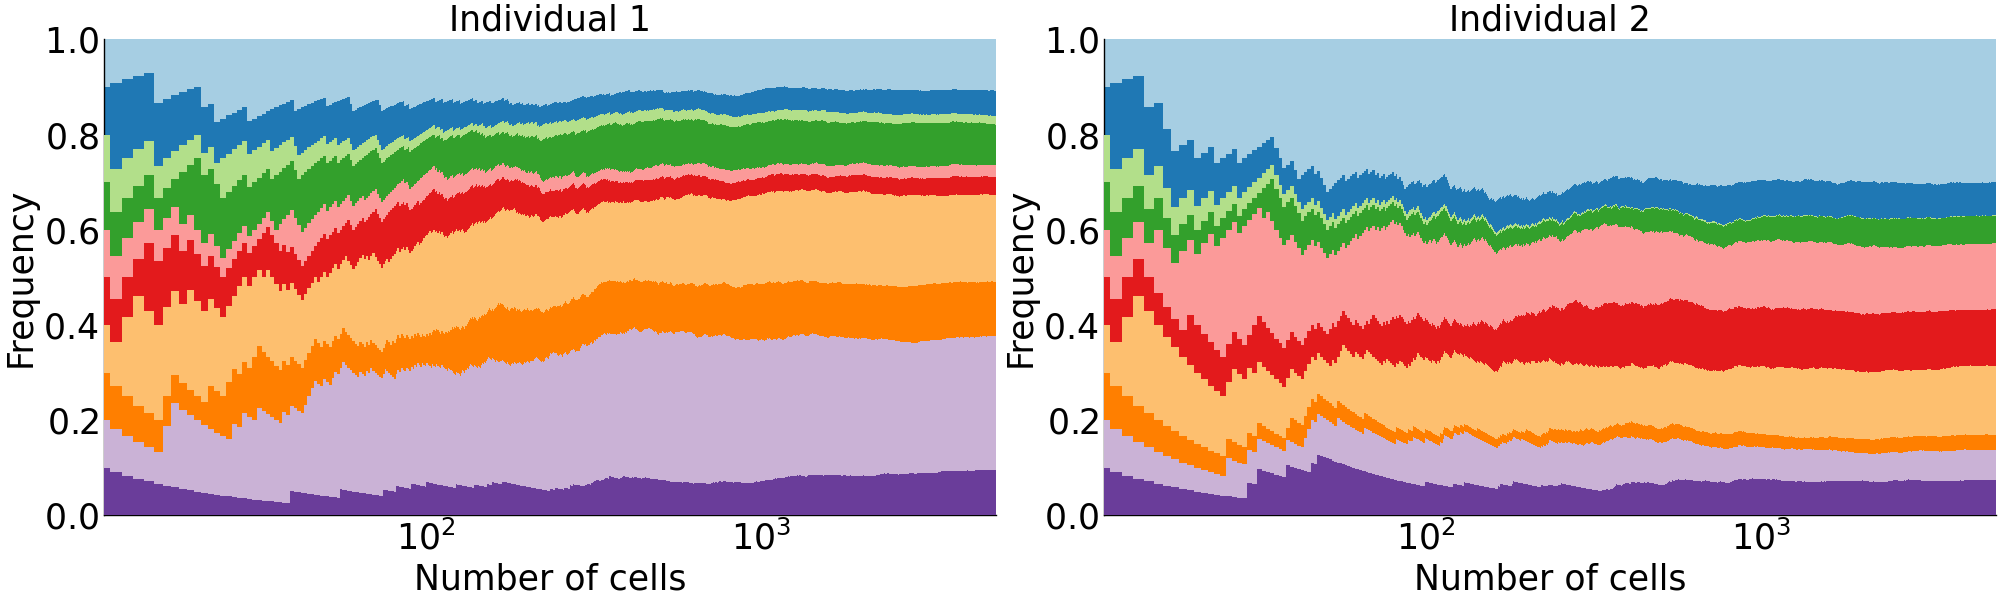

In [45]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot[:,1,1] clone_growth_plot[:,2,1] clone_growth_plot[:,3,1] clone_growth_plot[:,4,1] clone_growth_plot[:,5,1] clone_growth_plot[:,6,1] clone_growth_plot[:,7,1] clone_growth_plot[:,8,1] clone_growth_plot[:,9,1] clone_growth_plot[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 1", titlefontsize=25)
x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
groupedbar!([clone_growth_plot[:,1,2] clone_growth_plot[:,2,2] clone_growth_plot[:,3,2] clone_growth_plot[:,4,2] clone_growth_plot[:,5,2] clone_growth_plot[:,6,2] clone_growth_plot[:,7,2] clone_growth_plot[:,8,2] clone_growth_plot[:,9,2] clone_growth_plot[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 2", titlefontsize=25)
x2 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
plot(x1, x2, layout=grid(1,2), size = (2000,600))

In [46]:
clone_growth_plot_count = zeros(number_of_cells,number_of_clones,number_of_twins)
for i = 1:number_of_cells
    for j = 1:number_of_clones
        for k = 1:number_of_twins
            clone_growth_plot_count[i,j,k] = clone_growth_plot[i,j,k]*(i-1)    
        end
    end
end

In [47]:
clone_growth_plot_count

5000×10×2 Array{Float64, 3}:
[:, :, 1] =
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0
   1.0    1.0   1.0    1.0    1.0    1.0    1.0    1.0     1.0    1.0
   1.0    2.0   1.0    1.0    1.0    1.0    1.0    1.0     1.0    1.0
   1.0    2.0   1.0    1.0    1.0    1.0    2.0    1.0     1.0    1.0
   ⋮                                 ⋮           

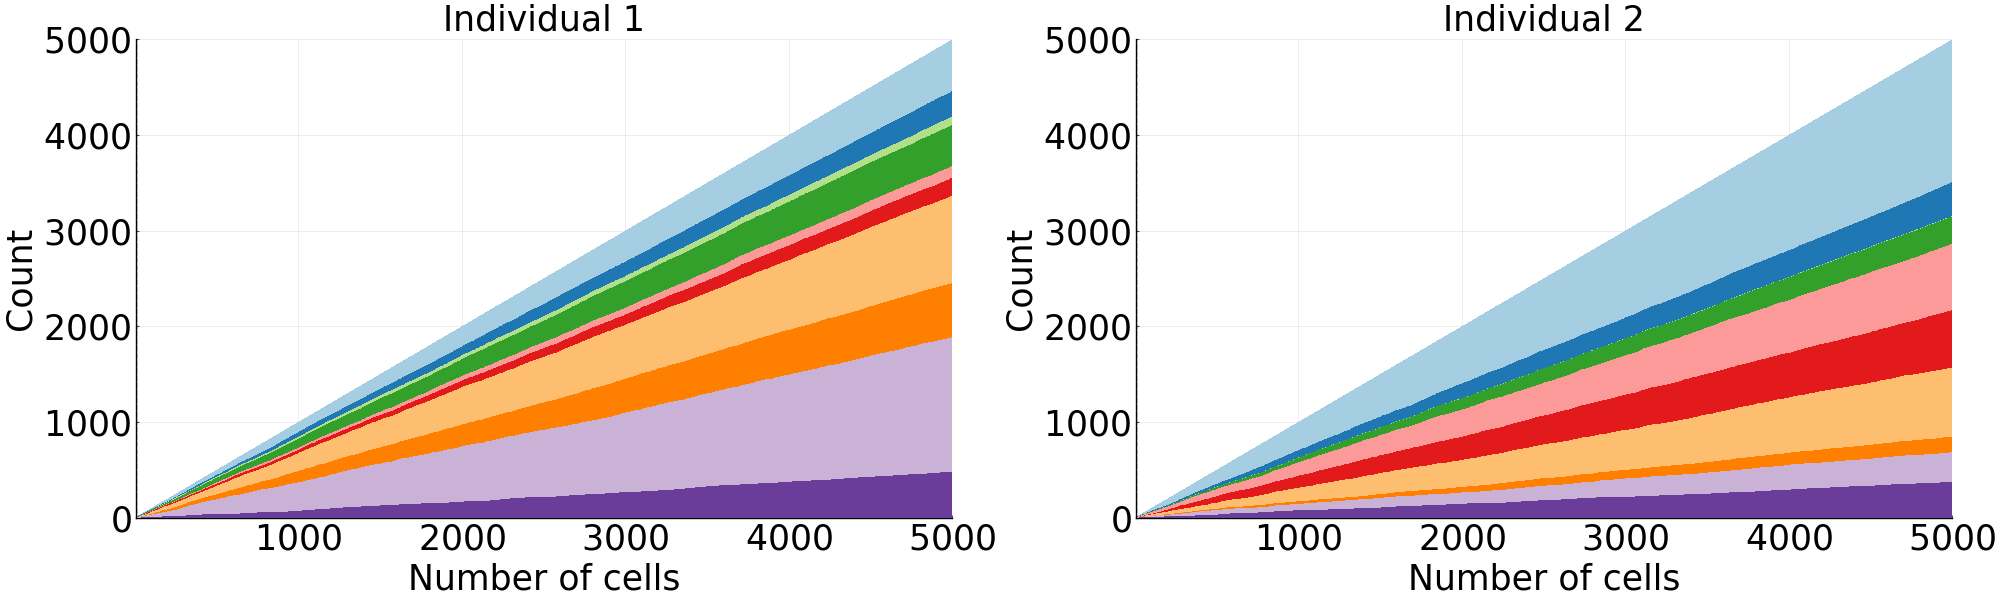

In [48]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot_count[:,1,1] clone_growth_plot_count[:,2,1] clone_growth_plot_count[:,3,1] clone_growth_plot_count[:,4,1] clone_growth_plot_count[:,5,1] clone_growth_plot_count[:,6,1] clone_growth_plot_count[:,7,1] clone_growth_plot_count[:,8,1] clone_growth_plot_count[:,9,1] clone_growth_plot_count[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :identity, ylims = [0.0, number_of_cells], yscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Count", yguidefontsize=25, title = "Individual 1", titlefontsize=25)
x1 = vline!([number_of_shared_cells], color = "Black", style = :dash)
plot()
groupedbar!([clone_growth_plot_count[:,1,2] clone_growth_plot_count[:,2,2] clone_growth_plot_count[:,3,2] clone_growth_plot_count[:,4,2] clone_growth_plot_count[:,5,2] clone_growth_plot_count[:,6,2] clone_growth_plot_count[:,7,2] clone_growth_plot_count[:,8,2] clone_growth_plot_count[:,9,2] clone_growth_plot_count[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :identity, ylims = [0.0, number_of_cells], yscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Count", yguidefontsize=25, title = "Individual 2", titlefontsize=25)
x2 = vline!([number_of_shared_cells], color = "Black", style = :dash)
plot()
plot(x1, x2, layout=grid(1,2), size = (2000,600))

## Simulation of human lifespan (from birth to 100 years)

In [49]:
#define parameters
number_of_cells = 5000 #number of cells
number_of_locations = 1000 #number of fCpG sites
number_of_time_steps = 365*100 #number of time steps (days)
number_of_shared_cells = 10 #number of shared cells
number_of_clones = 10 #number of clones
number_of_twins = 2 #number of twins

α = 1.0/(365.0)  #cell replacement rate 1.0/(365.0)
γ = 0.001 #(de)methylation rate 0.001

0.001

In [50]:
@time begin
    
    ave_cells = zeros(number_of_locations, 101, number_of_twins)
    clone_memory_dynamic = copy(clone_memory)
    fitness_cells = zeros(number_of_cells)

    clone_growth_plot_sim = zeros(100,number_of_clones,number_of_twins)

    for sim_number = 1:number_of_twins

        cells = copy(cells_twins_initial[:,:,sim_number])

        for fit = 1:number_of_cells
            fitness_cells[fit] = copy(fitness_clones[Int(clone_memory_dynamic[fit,sim_number])])
        end

        time_years = 1
        t = 0
        print(t/365, " years \n")
        ave_cells[:,1,sim_number] = mean(cells,dims=1)

        #simulation
        for t = 1:number_of_time_steps
            if mod(t,365) == 0
                time_years = time_years + 1
                if mod(time_years-1,10) == 0
                    print(t/365, " years \n")
                end
                ave_cells[:,time_years,sim_number] = mean(cells,dims=1)  

                counting_clones = copy(countmap(clone_memory_dynamic[:,sim_number]))
                for clone_counter = 1:length(values(counting_clones))
                    clone_growth_plot_sim[Int(t/365),Int(collect(keys(counting_clones))[clone_counter]),sim_number] = collect(values(counting_clones))[clone_counter]
                end
            end

            for i = 1:number_of_cells
                if rand(rng) < α #cell replacement event

                    pick = sample(rng, 1:number_of_cells, AnalyticWeights(fitness_cells))

                    cells[i,:] = copy(cells[pick,:])
                    clone_memory_dynamic[i,sim_number] = copy(clone_memory_dynamic[pick,sim_number])
                    fitness_cells[i] = copy(fitness_clones[Int(clone_memory_dynamic[pick,sim_number])])

                    for j = 1:number_of_locations                 
                        if rand(rng) < γ #(de)methylation event
                            if cells[i,j] == 0
                                cells[i,j] = 1
                            elseif cells[i,j] == 1
                                if rand(rng) < 0.5
                                    cells[i,j] = 0
                                else
                                    cells[i,j] = 2
                                end
                            elseif cells[i,j] == 2
                                cells[i,j] = 1
                            else
                                println("There is an error")
                            end
                        end
                    end
                end
            end 
        end
    end
    
end

0.0 years 
10.0 years 
20.0 years 
30.0 years 
40.0 years 
50.0 years 
60.0 years 
70.0 years 
80.0 years 
90.0 years 
100.0 years 
0.0 years 
10.0 years 
20.0 years 
30.0 years 
40.0 years 
50.0 years 
60.0 years 
70.0 years 
80.0 years 
90.0 years 
100.0 years 
177.067156 seconds (4.38 G allocations: 100.877 GiB, 10.17% gc time, 0.30% compilation time)


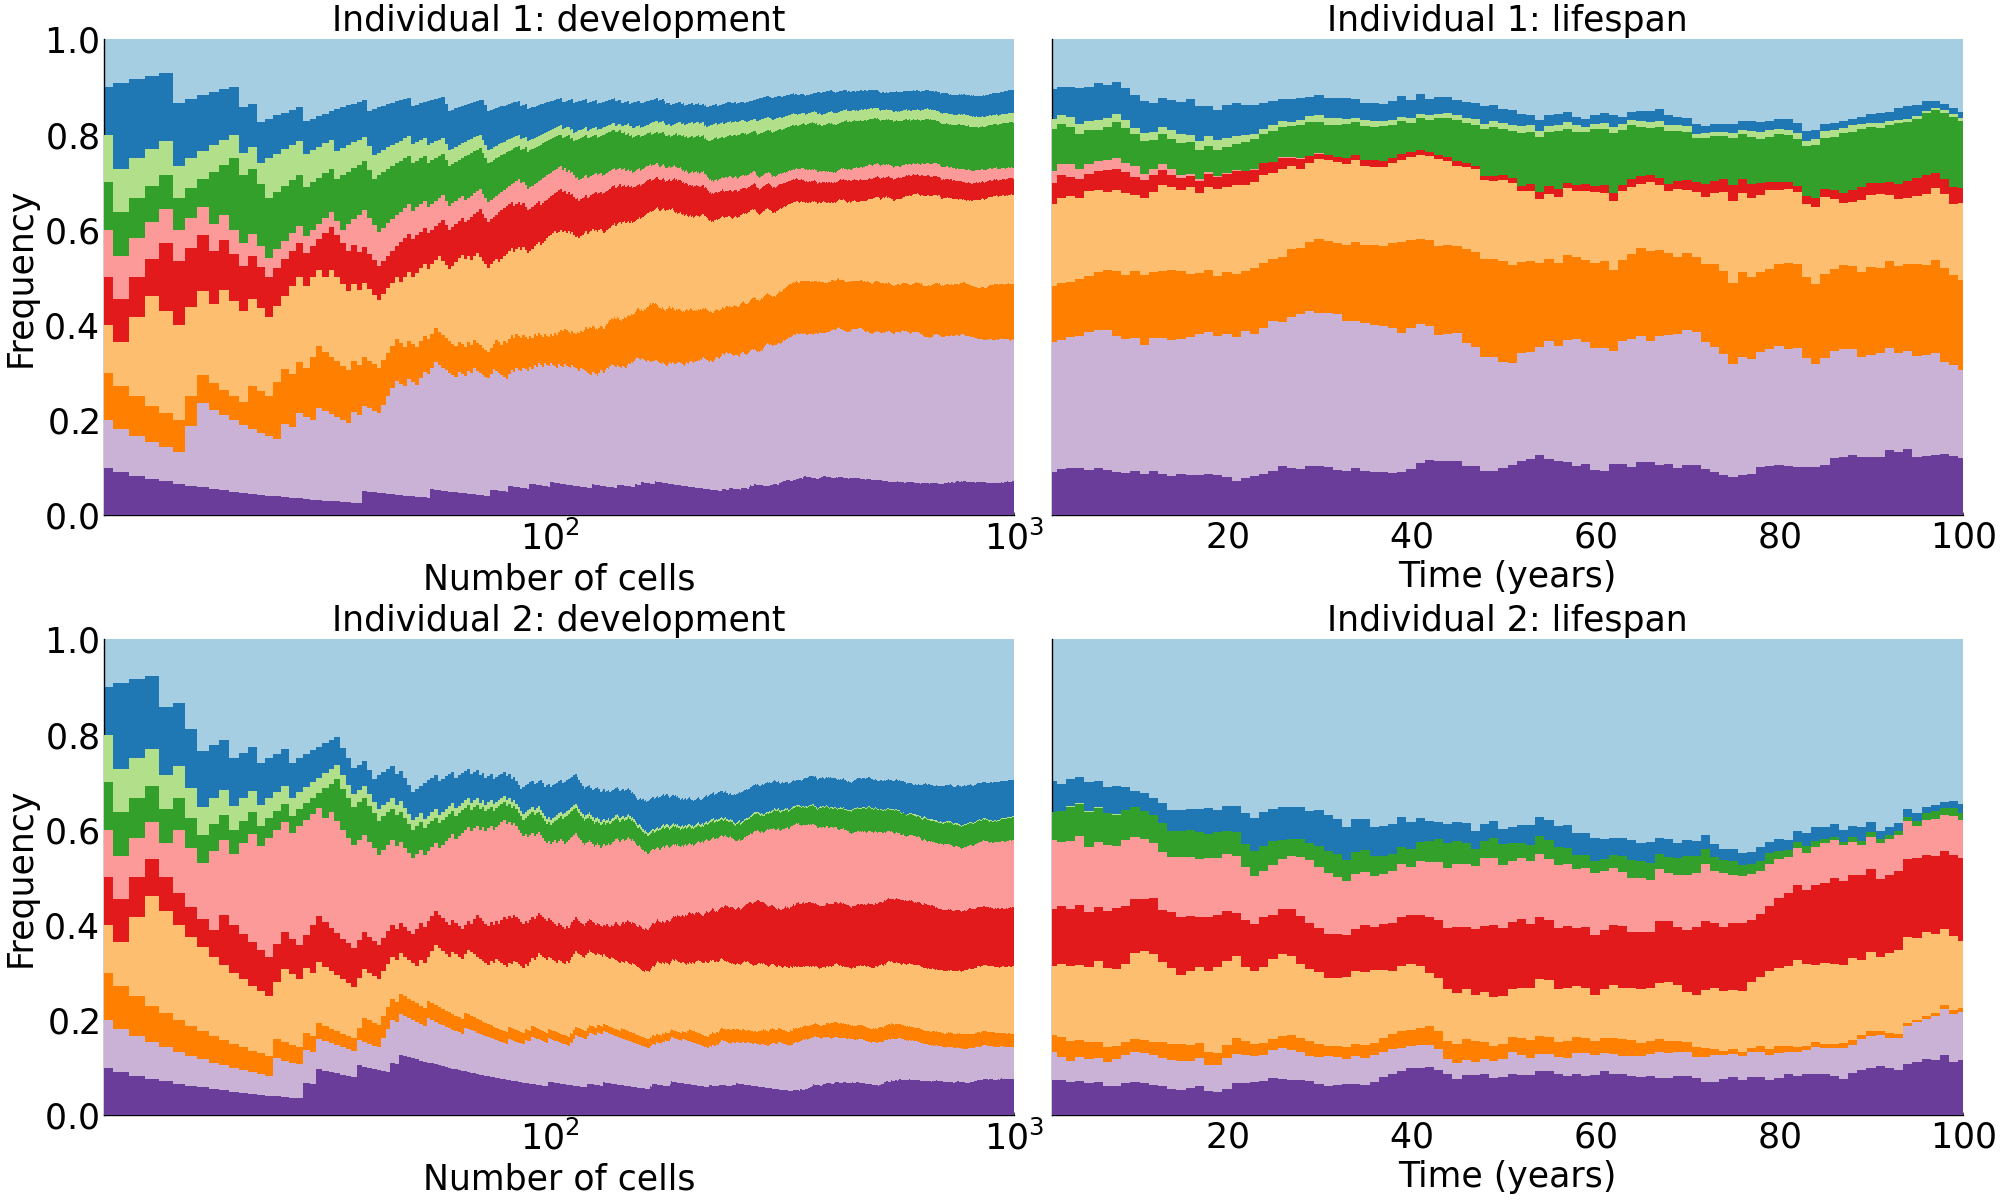

In [51]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot[:,1,1] clone_growth_plot[:,2,1] clone_growth_plot[:,3,1] clone_growth_plot[:,4,1] clone_growth_plot[:,5,1] clone_growth_plot[:,6,1] clone_growth_plot[:,7,1] clone_growth_plot[:,8,1] clone_growth_plot[:,9,1] clone_growth_plot[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, 1000], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 1: development", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t1x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
groupedbar!([clone_growth_plot[:,1,2] clone_growth_plot[:,2,2] clone_growth_plot[:,3,2] clone_growth_plot[:,4,2] clone_growth_plot[:,5,2] clone_growth_plot[:,6,2] clone_growth_plot[:,7,2] clone_growth_plot[:,8,2] clone_growth_plot[:,9,2] clone_growth_plot[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, 1000], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 2: development", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t2x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])

plot()
t1x2 = groupedbar!([clone_growth_plot_sim[:,1,1]./number_of_cells clone_growth_plot_sim[:,2,1]./number_of_cells clone_growth_plot_sim[:,3,1]./number_of_cells clone_growth_plot_sim[:,4,1]./number_of_cells clone_growth_plot_sim[:,5,1]./number_of_cells clone_growth_plot_sim[:,6,1]./number_of_cells clone_growth_plot_sim[:,7,1]./number_of_cells clone_growth_plot_sim[:,8,1]./number_of_cells clone_growth_plot_sim[:,9,1]./number_of_cells clone_growth_plot_sim[:,10,1]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Individual 1: lifespan", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yaxis = nothing)
plot()
t2x2 = groupedbar!([clone_growth_plot_sim[:,1,2]./number_of_cells clone_growth_plot_sim[:,2,2]./number_of_cells clone_growth_plot_sim[:,3,2]./number_of_cells clone_growth_plot_sim[:,4,2]./number_of_cells clone_growth_plot_sim[:,5,2]./number_of_cells clone_growth_plot_sim[:,6,2]./number_of_cells clone_growth_plot_sim[:,7,2]./number_of_cells clone_growth_plot_sim[:,8,2]./number_of_cells clone_growth_plot_sim[:,9,2]./number_of_cells clone_growth_plot_sim[:,10,2]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Individual 2: lifespan", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yaxis = nothing)
plot()
plot(t1x1, t1x2, t2x1, t2x2, layout=grid(2,2), size = (2000,1200))

In [52]:
ave_cells = ave_cells/2

1000×101×2 Array{Float64, 3}:
[:, :, 1] =
 0.5786  0.586   0.5801  0.5817  0.5859  …  0.4951  0.4855  0.49    0.4694
 0.741   0.7337  0.7312  0.743   0.7366     0.5898  0.5886  0.5886  0.5855
 0.5     0.4846  0.4977  0.4968  0.4911     0.5872  0.5963  0.5845  0.6009
 0.775   0.7815  0.7765  0.7716  0.7874     0.8116  0.8059  0.8043  0.7875
 0.3946  0.3911  0.3908  0.3898  0.3974     0.4003  0.3821  0.3739  0.3684
 0.2624  0.2729  0.2757  0.2787  0.2945  …  0.3553  0.3563  0.3459  0.339
 0.5054  0.4978  0.4962  0.5018  0.4929     0.4865  0.4807  0.4844  0.4702
 0.525   0.5107  0.5225  0.524   0.5146     0.6078  0.6205  0.6162  0.6323
 0.4456  0.4457  0.4461  0.442   0.4377     0.5569  0.5653  0.5756  0.5733
 0.0626  0.0708  0.0729  0.0675  0.0628     0.0546  0.0541  0.0512  0.0473
 0.6928  0.666   0.6721  0.6814  0.6713  …  0.6181  0.6111  0.603   0.6111
 0.5274  0.5196  0.5268  0.522   0.5054     0.5588  0.5811  0.5937  0.6015
 0.2522  0.2688  0.2613  0.2587  0.2711     0.3705  0.3731 

In [53]:
#calculate Pearson coefficient over time
pearson_cells = zeros(101)
for i = 1:101
    cor_cells = cor(ave_cells[:,i,:])
    vec_cells = cor_cells[tril!(trues(size(cor_cells)), -1)]
    pearson_cells[i] = vec_cells[1]
end

In [54]:
pearson_cells

101-element Vector{Float64}:
 0.6450423161415954
 0.6462448576279188
 0.6359158745897898
 0.6311313348761205
 0.628627497028446
 0.6137971955479963
 0.6069248502866383
 0.5875370430424336
 0.597628367254334
 0.6211190465919214
 0.6426735589336047
 0.6619187036566684
 0.6561986208483542
 ⋮
 0.6295933614859903
 0.6270646680677638
 0.6126968299173859
 0.6066114425386824
 0.6032431070833919
 0.630425958810952
 0.6192875509269332
 0.623711523641231
 0.6188563529115791
 0.6402950613120666
 0.6540869316753911
 0.6602726673241505

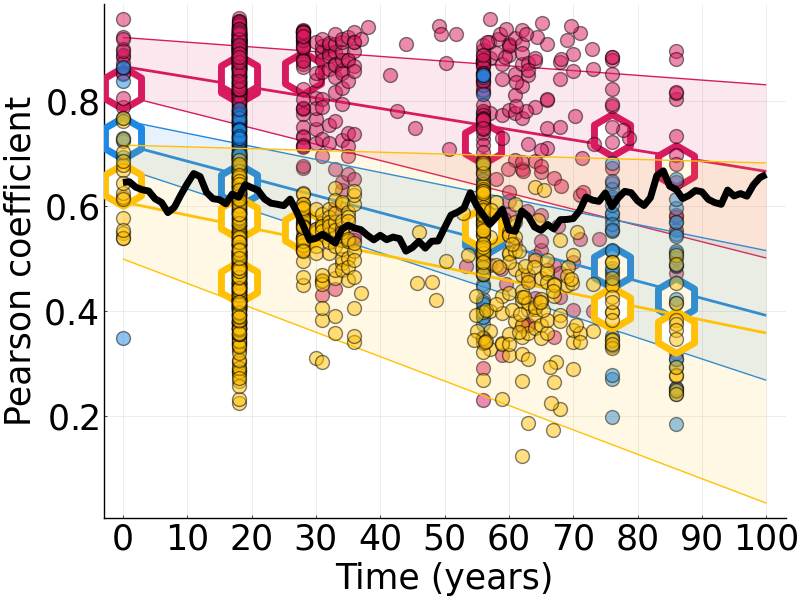

In [55]:
#plot all data together
scatter()

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(365*mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(365*mz_data_all[:,1], mz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
scatter!(365*dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(365*dz_data_all[:,1], dz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
scatter!(365*ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(365*ur_data_all[:,1], ur_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0,100,101), pearson_cells, xticks = (365*(0:10:100), string.(0:10:100)), color = "black", linewidth = 5, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

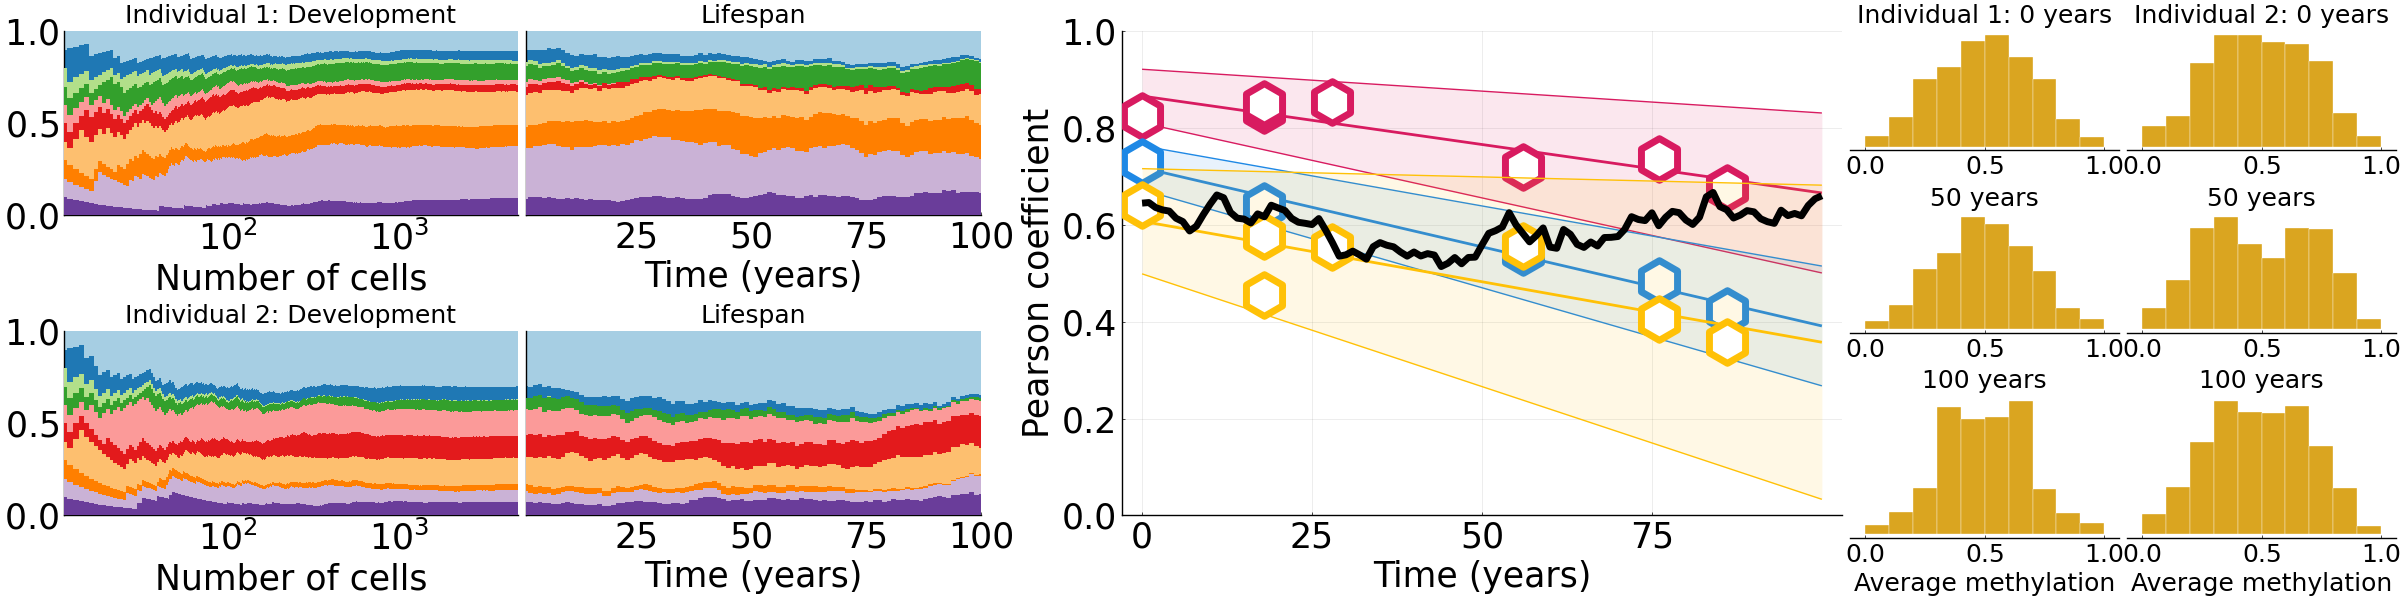

In [56]:
### plots

#all together for figure


#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot[:,1,1] clone_growth_plot[:,2,1] clone_growth_plot[:,3,1] clone_growth_plot[:,4,1] clone_growth_plot[:,5,1] clone_growth_plot[:,6,1] clone_growth_plot[:,7,1] clone_growth_plot[:,8,1] clone_growth_plot[:,9,1] clone_growth_plot[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="", yguidefontsize=25, title = "Individual 1: Development", titlefontsize=18, ylims = [0,1], yticks = [0.0, 0.5, 1.0], xticks = [100, 1000])
t1x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
groupedbar!([clone_growth_plot[:,1,2] clone_growth_plot[:,2,2] clone_growth_plot[:,3,2] clone_growth_plot[:,4,2] clone_growth_plot[:,5,2] clone_growth_plot[:,6,2] clone_growth_plot[:,7,2] clone_growth_plot[:,8,2] clone_growth_plot[:,9,2] clone_growth_plot[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="", yguidefontsize=25, title = "Individual 2: Development", titlefontsize=18, ylims = [0,1], yticks = [0.0, 0.5, 1.0], xticks = [100, 1000])
t2x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])

plot()
t1x2 = groupedbar!([clone_growth_plot_sim[:,1,1]./number_of_cells clone_growth_plot_sim[:,2,1]./number_of_cells clone_growth_plot_sim[:,3,1]./number_of_cells clone_growth_plot_sim[:,4,1]./number_of_cells clone_growth_plot_sim[:,5,1]./number_of_cells clone_growth_plot_sim[:,6,1]./number_of_cells clone_growth_plot_sim[:,7,1]./number_of_cells clone_growth_plot_sim[:,8,1]./number_of_cells clone_growth_plot_sim[:,9,1]./number_of_cells clone_growth_plot_sim[:,10,1]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), xticks = ((25:25:100), string.(25:25:100)), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Lifespan", titlefontsize=18, ylims = [0,1], yaxis = nothing)
plot()
t2x2 = groupedbar!([clone_growth_plot_sim[:,1,2]./number_of_cells clone_growth_plot_sim[:,2,2]./number_of_cells clone_growth_plot_sim[:,3,2]./number_of_cells clone_growth_plot_sim[:,4,2]./number_of_cells clone_growth_plot_sim[:,5,2]./number_of_cells clone_growth_plot_sim[:,6,2]./number_of_cells clone_growth_plot_sim[:,7,2]./number_of_cells clone_growth_plot_sim[:,8,2]./number_of_cells clone_growth_plot_sim[:,9,2]./number_of_cells clone_growth_plot_sim[:,10,2]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), xticks = ((25:25:100), string.(25:25:100)), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Lifespan", titlefontsize=18, ylims = [0,1], yaxis = nothing)
plot()
plot1 = plot(t1x1, t1x2, t2x1, t2x2, layout=grid(2,2), size = (2000,1200))

#plot all data together
scatter()

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(365*mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*mz_data_all[:,1], mz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
scatter!(365*dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*dz_data_all[:,1], dz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
scatter!(365*ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*ur_data_all[:,1], ur_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot2 = plot!(365*LinRange(0,100,101), pearson_cells, xticks = (365*(0:25:75), string.(0:25:75)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "black", linewidth = 5, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#histograms of average methylation over time
plot()
x1_0 = histogram(ave_cells[:,1,1], lw = 0.25, linestyle = :solid, linecolor = "white", grid = false, size =(1600/2,600), xticks = [0.0, 0.5, 1.0], yaxis = false, palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.1:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=18, ytickfontsize=20, xlabel="", xguidefontsize=18, ylabel="", yguidefontsize=20, title = "Individual 1: 0 years", titlefontsize=18)
x2_0 = histogram(ave_cells[:,1,2], lw = 0.25, linestyle = :solid, linecolor = "white", grid = false, size =(1600/2,600), xticks = [0.0, 0.5, 1.0], yaxis = false, palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.1:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=18, ytickfontsize=20, xlabel="", xguidefontsize=18, ylabel="", yguidefontsize=20, title = "Individual 2: 0 years", titlefontsize=18)
x1_50 = histogram(ave_cells[:,51,1], lw = 0.25, linestyle = :solid, linecolor = "white", grid = false, size =(1600/2,600), xticks = [0.0, 0.5, 1.0], yaxis = false, palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.1:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=18, ytickfontsize=20, xlabel="", xguidefontsize=18, ylabel="", yguidefontsize=20, title = "50 years", titlefontsize=18)
x2_50 = histogram(ave_cells[:,51,2], lw = 0.25, linestyle = :solid, linecolor = "white", grid = false, size =(1600/2,600), xticks = [0.0, 0.5, 1.0], yaxis = false, palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.1:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=18, ytickfontsize=20, xlabel="", xguidefontsize=18, ylabel="", yguidefontsize=20, title = "50 years", titlefontsize=18)
x1_100 = histogram(ave_cells[:,101,1], lw = 0.25, linestyle = :solid, linecolor = "white", grid = false, size =(1600/2,600), xticks = [0.0, 0.5, 1.0], yaxis = false, palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.1:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=18, ytickfontsize=20, xlabel="Average methylation", xguidefontsize=18, ylabel="", yguidefontsize=20, title = "100 years", titlefontsize=18)
x2_100 = histogram(ave_cells[:,101,2], lw = 0.25, linestyle = :solid, linecolor = "white", grid = false, size =(1600/2,600), xticks = [0.0, 0.5, 1.0], yaxis = false, palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.1:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=18, ytickfontsize=20, xlabel="Average methylation", xguidefontsize=18, ylabel="", yguidefontsize=20, title = "100 years", titlefontsize=18)
plot3 = plot(x1_0, x2_0, x1_50, x2_50, x1_100, x2_100, layout=grid(3,2), size = (1600,1200))

l = @layout [a{0.42w}  b{0.33w}  c{0.25w}]
full_figure = plot(plot1, plot2, plot3, layout = l, widths=[0.75, 0.25, 0.25], size = (1600/2*3,600))

## Comparison of fitness distributions

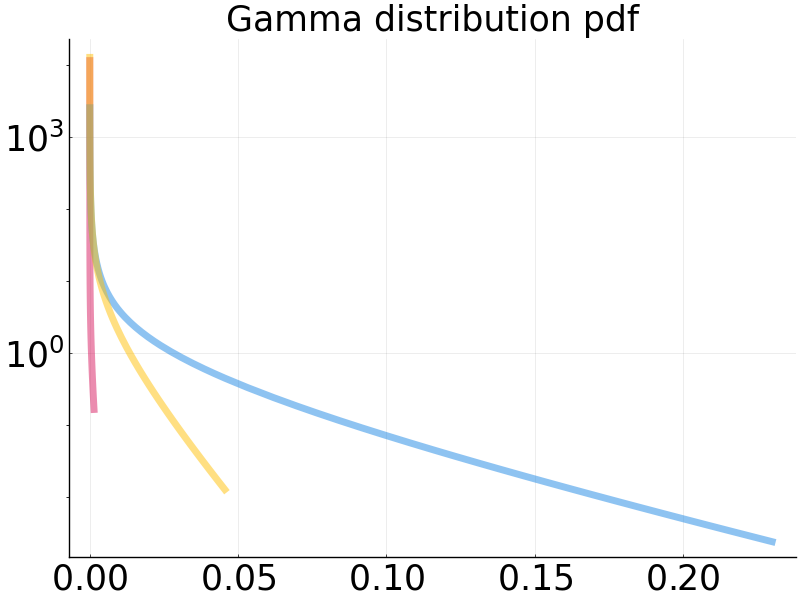

In [57]:
a_shape = 0.001 #gamma distribution shape parameter
theta_scale = 0.001 #gamma distribution scale parameter
dist_very_weak = Gamma(a_shape,theta_scale)

a_shape = 0.05 
theta_scale = 0.05 
dist_weak = Gamma(a_shape,theta_scale)

a_shape = 0.05 
theta_scale = 0.01
dist_strong = Gamma(a_shape,theta_scale)

#plot distributions
plot()
plot!(dist_very_weak, yaxis = :log, width = 5, size =(1600/2,600), font = "Ariel", alpha = 0.5, color = color1, legend = false, xtickfontsize=25, ytickfontsize=25,xguidefontsize=25,yguidefontsize=25,title = "Gamma distribution pdf",titlefontsize=25)
plot!(dist_weak, yaxis = :log, width = 5, size =(1600/2,600), font = "Ariel", alpha = 0.5, color = color3, legend = false, xtickfontsize=25, ytickfontsize=25,xguidefontsize=25,yguidefontsize=25,title = "Gamma distribution pdf",titlefontsize=25)
plot!(dist_strong, yaxis = :log, width = 5, size =(1600/2,600), font = "Ariel", alpha = 0.5, color = color5, legend = false, xtickfontsize=25, ytickfontsize=25,xguidefontsize=25,yguidefontsize=25,title = "Gamma distribution pdf",titlefontsize=25)

## Large-scale multiple sims 

In [60]:
pearson_cells_all_sims_mz_neutral = readdlm("pearson_cells_all_sims_mz_neutral.csv", ',')
pearson_cells_all_sims_mz_weak = readdlm("pearson_cells_all_sims_mz_weak.csv", ',')
pearson_cells_all_sims_mz_strong = readdlm("pearson_cells_all_sims_mz_strong.csv", ',')

101×100 Matrix{Float64}:
 0.912241  0.898041  0.785126  0.919632  …  0.965716  0.906972  0.878506
 0.916738  0.88943   0.800784  0.914412     0.968241  0.899829  0.880751
 0.916571  0.872875  0.81547   0.9079       0.959305  0.902074  0.880301
 0.9033    0.874901  0.822516  0.916462     0.958312  0.891098  0.89732
 0.916251  0.869579  0.81946   0.900587     0.957583  0.873908  0.887278
 0.912401  0.881546  0.826003  0.905437  …  0.958499  0.864001  0.885851
 0.904592  0.887242  0.835077  0.892985     0.95917   0.888126  0.883733
 0.911993  0.87403   0.823825  0.899083     0.957271  0.884021  0.873832
 0.917347  0.85574   0.822464  0.89751      0.959418  0.87766   0.873992
 0.923322  0.871759  0.808806  0.911257     0.965921  0.879927  0.903715
 0.92106   0.861544  0.803418  0.907468  …  0.969271  0.880624  0.909943
 0.907821  0.856669  0.789532  0.910828     0.974021  0.87467   0.921625
 0.901674  0.855682  0.765782  0.926224     0.963731  0.857554  0.931577
 ⋮                         

In [61]:
pearson_cells_all_sims_mz_neutral_mean = mean(pearson_cells_all_sims_mz_neutral, dims = 2)
pearson_cells_all_sims_mz_weak_mean = mean(pearson_cells_all_sims_mz_weak, dims = 2)
pearson_cells_all_sims_mz_strong_mean = mean(pearson_cells_all_sims_mz_strong, dims = 2)

101×1 Matrix{Float64}:
 0.8757278926396975
 0.8755230053660104
 0.874492798919993
 0.8731889802533693
 0.87152248224252
 0.871730025387624
 0.870873178001937
 0.8697549123659772
 0.8688856970362889
 0.8686158036804567
 0.8679795145585588
 0.8669231807808113
 0.8648686709369804
 ⋮
 0.8161898078675753
 0.8140117431548002
 0.8105777970184748
 0.8090435555262148
 0.8086458219671122
 0.8089745289187656
 0.8092657208765546
 0.8091565424767745
 0.8078687294807152
 0.8074326163966302
 0.8040980704674048
 0.8035022152815746

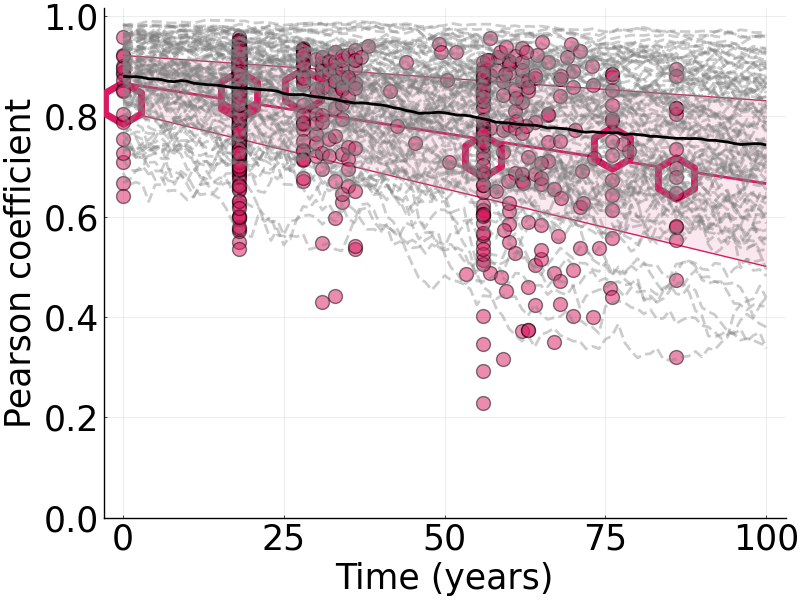

In [62]:
#plot all data together
scatter()

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(365*mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(365*mz_data_all[:,1], mz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
#scatter!(365*dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*dz_data_all[:,1], dz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
#scatter!(365*ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*ur_data_all[:,1], ur_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0,100,101), pearson_cells_all_sims_mz_neutral, xticks = (365*(0:25:100), string.(0:25:100)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "gray", linestyle = :dash, alpha = 0.4, linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)
plot!(365*LinRange(0,100,101), pearson_cells_all_sims_mz_neutral_mean, xticks = (365*(0:25:100), string.(0:25:100)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "black", alpha = 1.0, linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

In [63]:
y_mz_traj = readdlm("mz_data_trajectory.csv", ',')
time_vector = [0, 18, 28, 56, 76, 86]

6-element Vector{Int64}:
  0
 18
 28
 56
 76
 86

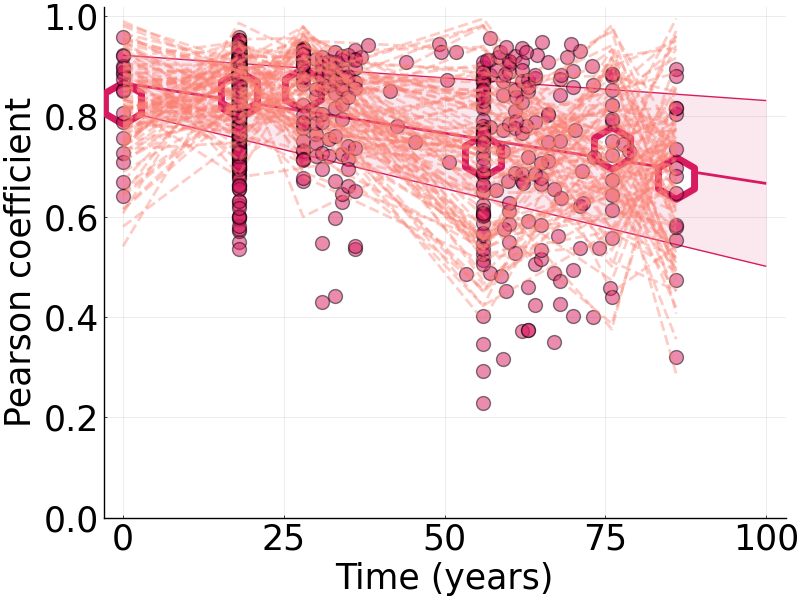

In [64]:
#plot all data together
scatter()

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(365*mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(365*mz_data_all[:,1], mz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
#scatter!(365*dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*dz_data_all[:,1], dz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
#scatter!(365*ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*ur_data_all[:,1], ur_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*time_vector, y_mz_traj, xticks = (365*(0:25:100), string.(0:25:100)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "salmon", linestyle = :dash, alpha = 0.4, linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

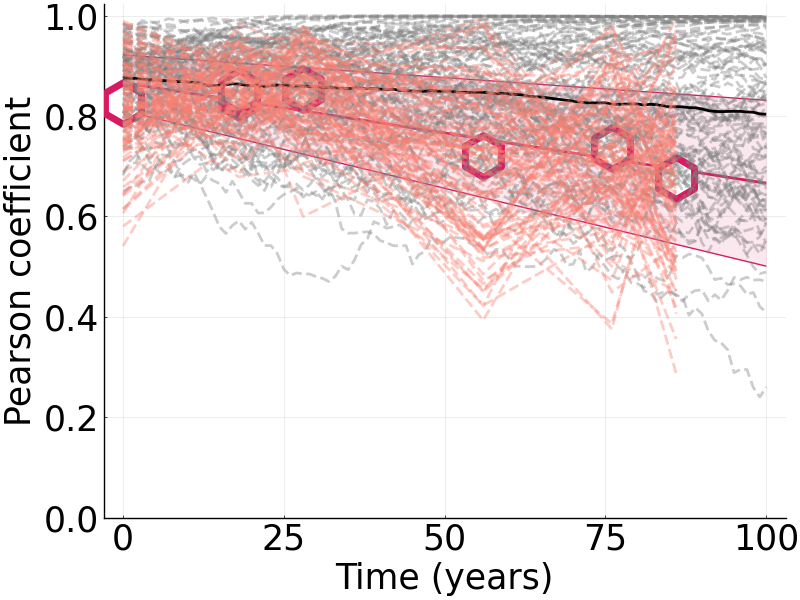

In [65]:
#plot all data together
scatter()

plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), linewidth = 1, color = color1, alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[1], interval_p2_mean_mz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_mz[2], interval_p2_mean_mz[2]]), fillalpha = 0.1, color = color1, label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_mz[1], bf_parms_mean_mz[2]]), linewidth = 2, color = color1, alpha = 1)
scatter!(365*mz_data_mean_all[:,1], mz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color1, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*mz_data_all[:,1], mz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), linewidth = 1, color = color3, alpha = 1)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[1], interval_p2_mean_dz[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_dz[2], interval_p2_mean_dz[2]]), fillalpha = 0.1, color = color3, label = "Confidence band", legend = :topleft)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_dz[1], bf_parms_mean_dz[2]]), linewidth = 2, color = color3, alpha = 1)
#scatter!(365*dz_data_mean_all[:,1], dz_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color3, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*dz_data_all[:,1], dz_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), linewidth = 1, color = color5, alpha = 1)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[1], interval_p2_mean_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mean_ur[2], interval_p2_mean_ur[2]]), fillalpha = 0.1, color = color5, label = "Confidence band", legend = :topleft)
#plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mean_ur[1], bf_parms_mean_ur[2]]), linewidth = 2, color = color5, alpha = 1)
#scatter!(365*ur_data_mean_all[:,1], ur_data_mean_all[:,2], alpha = 1.0, markersize = 30, markershape = :hexagon, size =(1600/2,600), font = "Ariel", color_palette = palette(["white", "white"],2), markerstrokecolor = color5, markerstrokewidth = 5, legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(365*ur_data_all[:,1], ur_data_all[:,2], markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.5, color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(365*LinRange(0,100,101), pearson_cells_all_sims_mz_strong, xticks = (365*(0:25:100), string.(0:25:100)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "gray", linestyle = :dash, alpha = 0.4, linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)
plot!(365*LinRange(0,100,101), pearson_cells_all_sims_mz_strong_mean, xticks = (365*(0:25:100), string.(0:25:100)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "black", alpha = 1.0, linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

plot!(365*time_vector, y_mz_traj, xticks = (365*(0:25:100), string.(0:25:100)), yticks = ((0:0.2:1), string.(0:0.2:1)), color = "salmon", linestyle = :dash, alpha = 0.4, linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

In [66]:
pearson_cells_all_sims_mz_neutral_short = pearson_cells_all_sims_mz_neutral[[1,19,29,57,77,87],:]
pearson_cells_all_sims_mz_weak_short = pearson_cells_all_sims_mz_weak[[1,19,29,57,77,87],:]
pearson_cells_all_sims_mz_strong_short = pearson_cells_all_sims_mz_strong[[1,19,29,57,77,87],:]

6×100 Matrix{Float64}:
 0.912241  0.898041  0.785126  0.919632  …  0.965716  0.906972  0.878506
 0.938248  0.893227  0.753128  0.904806     0.963146  0.794047  0.898333
 0.914872  0.866712  0.777198  0.875414     0.973482  0.823166  0.918221
 0.911425  0.690301  0.700391  0.937584     0.92662   0.819172  0.851216
 0.887524  0.629109  0.481972  0.867296     0.94827   0.839283  0.780759
 0.874456  0.69116   0.442631  0.911161  …  0.945132  0.836963  0.674357

In [67]:
distance_neutral = 0
for k = 1:100 #number of data trajectory sims
    for i = 1:100 #number of model simulations sims
        for j = 1:6 #number of points per sim
            distance_neutral = distance_neutral + abs(pearson_cells_all_sims_mz_neutral_short[j,i] - y_mz_traj[j,k])
        end
    end
end
distance_neutral/6/100/100

0.13354872128230139

In [68]:
distance_weak = 0
for k = 1:100 #number of data trajectory sims
    for i = 1:100 #number of model simulations sims
        for j = 1:6 #number of points per sim
            distance_weak = distance_weak + abs(pearson_cells_all_sims_mz_weak_short[j,i] - y_mz_traj[j,k])
        end
    end
end
distance_weak/6/100/100

0.13228712620459318

In [69]:
distance_strong = 0
for k = 1:100 #number of data trajectory sims
    for i = 1:100 #number of model simulations sims
        for j = 1:6 #number of points per sim
            distance_strong = distance_strong + abs(pearson_cells_all_sims_mz_strong_short[j,i] - y_mz_traj[j,k])
        end
    end
end
distance_strong/6/100/100

0.14264109827476293